<a href="https://colab.research.google.com/github/maliksalman55/Final-code/blob/main/ResNet_50_Classifications_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import os
import shutil

src_path = '/content/drive/MyDrive/kaggle (1).json'
dest_directory = '/root/.kaggle/'

# Create the destination directory if it doesn't exist
os.makedirs(dest_directory, exist_ok=True)

# Copy the Kaggle JSON file to the destination
shutil.copy(src_path, dest_directory)

'/root/.kaggle/kaggle (1).json'

In [3]:
# run this for dataset download
!kaggle datasets download -d markdaniellampa/fish-dataset

Dataset URL: https://www.kaggle.com/datasets/markdaniellampa/fish-dataset
License(s): Community Data License Agreement - Sharing - Version 1.0
100% 1.57G/1.58G [00:12<00:00, 176MB/s]
100% 1.58G/1.58G [00:12<00:00, 141MB/s]


In [4]:
# unzip download file
import zipfile
zip_ref = zipfile.ZipFile ('/content/fish-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content//FishImgDataset/train', # I pass and use train dataset path.
    labels="inferred", # because we hv labels dataset.
    label_mode="categorical",   # we use categorical became we hv more then 2 classes
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None, # if we need to rotate image then put seed value.
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8809 files belonging to 31 classes.


In [18]:
# Test Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/FishImgDataset/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2751 files belonging to 31 classes.


In [8]:
# Load the pre-trained ResNet50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [9]:
model = Sequential()

In [10]:
# Add the ResNet50 base model
model.add(base_model)

In [11]:
# Add Global Average Pooling layer
model.add(GlobalAveragePooling2D())


In [12]:
# Add a fully connected layer with batch normalization and dropout
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [13]:
# Add the output layer (adjust the number of units for your dataset)
model.add(Dense(31, activation='softmax'))

In [22]:
#Compiling and Training Phase
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 31)                1

In [24]:
# start traning also save traning history
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
276/276 [==============================] - 153s 398ms/step - loss: 2.5239 - accuracy: 0.3476 - val_loss: 2.4549 - val_accuracy: 0.3799
Epoch 2/32
276/276 [==============================] - 104s 374ms/step - loss: 1.5370 - accuracy: 0.5635 - val_loss: 1.5958 - val_accuracy: 0.5558
Epoch 3/32
276/276 [==============================] - 104s 374ms/step - loss: 0.9875 - accuracy: 0.7121 - val_loss: 1.7767 - val_accuracy: 0.4958
Epoch 4/32
276/276 [==============================] - 105s 378ms/step - loss: 0.7139 - accuracy: 0.7844 - val_loss: 2.4048 - val_accuracy: 0.4431
Epoch 5/32
276/276 [==============================] - 105s 378ms/step - loss: 0.5507 - accuracy: 0.8336 - val_loss: 0.6063 - val_accuracy: 0.8230
Epoch 6/32
276/276 [==============================] - 104s 374ms/step - loss: 0.3279 - accuracy: 0.8962 - val_loss: 1.6020 - val_accuracy: 0.5889
Epoch 7/32
276/276 [==============================] - 114s 413ms/step - loss: 0.2890 - accuracy: 0.9120 - val_loss: 1.3277 -

In [25]:
# Evaluating Model
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

276/276 [==============================] - 42s 151ms/step - loss: 0.3261 - accuracy: 0.9053
Training accuracy: 0.9053241014480591


In [26]:
# Test set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Test accuracy:', val_acc)

86/86 [==============================] - 13s 141ms/step - loss: 0.4277 - accuracy: 0.8891
Test accuracy: 0.8891312479972839


In [27]:
# Save Resnet-50 model
model.save('/content/drive/MyDrive/Models saver/Resnet-50-Class-model.keras')

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
# Load the saved model
saved_model_path = '/content/drive/MyDrive/Models saver/Resnet-50-Class-model.keras'  # Specify the path to your saved model
loaded_model = tf.keras.models.load_model(saved_model_path)

In [30]:
# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

In [31]:
# Iterate through the validation dataset and collect true and predicted labels
for images, labels in validation_set:
    true_labels.extend(np.argmax(labels, axis=1))  # Extract true labels
    predictions = loaded_model.predict(images)  # Predict labels
    predicted_labels.extend(np.argmax(predictions, axis=1))

1/1 [==============================] - 2s 2s/step


In [32]:
# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

In [33]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[ 47   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0   0   3   0   0   0   0   0]
 [  0  47   0   0   0   0   2   0   1   2   0   5   0   0   0   0   0   0
    0   0   4   0   0   1   0   0   0   0   0   1   0]
 [  0   0  60   0   0   0   0   1   0   2   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  74   0   0   6   0   0   1   0   5   0   0   0   0   0   0
    0   0   8   0   0   3   0   0   0   0   0   0   0]
 [  0   1   0   0  35   0   0   0   2   2   0   1   0   0   0   0   1   0
    1   0   2   1   0   0   0   0   0   2   0   0   0]
 [  0   1   0   1   0  48   3   0   1   0   0   0   0   0   1   0   0   0
    2   0   3   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  80   0   1   0   0   0   0   0   0   0   0   0
    0   0   2   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 121   2   0   0   0   0   0   0   0   0   0
    0

In [34]:
# We can also print a classification report for additional metrics
report = classification_report(true_labels, predicted_labels, labels=range(31), target_names=validation_set.class_names)
print("Classification Report:")
print(report)


Classification Report:
                       precision    recall  f1-score   support

               Bangus       0.92      0.90      0.91        52
        Big Head Carp       0.92      0.75      0.82        63
   Black Spotted Barb       0.94      0.95      0.94        63
              Catfish       0.96      0.76      0.85        97
       Climbing Perch       0.97      0.73      0.83        48
 Fourfinger Threadfin       0.98      0.80      0.88        60
       Freshwater Eel       0.70      0.95      0.80        84
       Glass Perchlet       0.95      0.98      0.96       124
                 Goby       0.91      0.96      0.93       189
            Gold Fish       0.73      1.00      0.84        65
              Gourami       0.99      0.94      0.96        97
           Grass Carp       0.90      0.98      0.94       378
 Green Spotted Puffer       1.00      1.00      1.00        34
          Indian Carp       0.95      0.93      0.94        81
  Indo-Pacific Tarpon       0.9

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

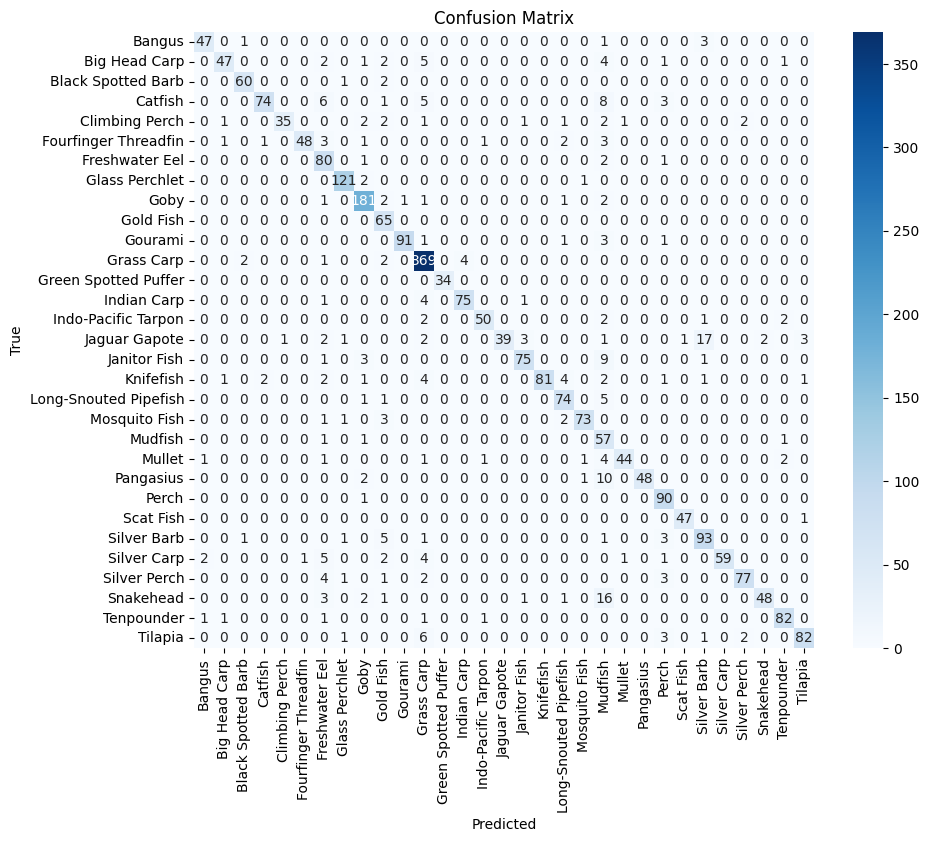

In [36]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=validation_set.class_names, yticklabels=validation_set.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [37]:
#Return Dictionary of history
training_history.history

{'loss': [2.5239481925964355,
  1.536996603012085,
  0.9875074625015259,
  0.7139273285865784,
  0.5506656169891357,
  0.32785940170288086,
  0.2889638841152191,
  0.1877155303955078,
  0.19242875277996063,
  0.1809171587228775,
  0.16979551315307617,
  0.10124943405389786,
  0.09451636672019958,
  0.17105650901794434,
  0.13455861806869507,
  0.09532427042722702,
  0.06889569014310837,
  0.11114951223134995,
  0.09195514023303986,
  0.1075570210814476,
  0.13786832988262177,
  0.05965699627995491,
  0.04824117198586464,
  0.07284731417894363,
  0.07481194287538528,
  0.08470604568719864,
  0.07809456437826157,
  0.10643517225980759,
  0.04033316299319267,
  0.034579262137413025,
  0.05395634099841118,
  0.0595301054418087],
 'accuracy': [0.347599059343338,
  0.5635145902633667,
  0.7121126055717468,
  0.7844250202178955,
  0.8335793018341064,
  0.8962424993515015,
  0.912021815776825,
  0.9409694671630859,
  0.9411965012550354,
  0.9416505694389343,
  0.9467589855194092,
  0.969008982

In [38]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [39]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [40]:
#Calculating Accuracy of Model Achieved on Test set
print("Test set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100)) # (-1) show use final Accuracy


Test set Accuracy: 88.9131247997284 %


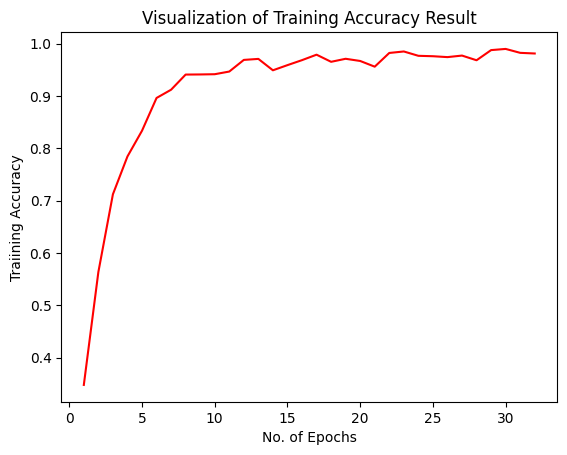

In [41]:
#Accuracy Visualization Training Visualization
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

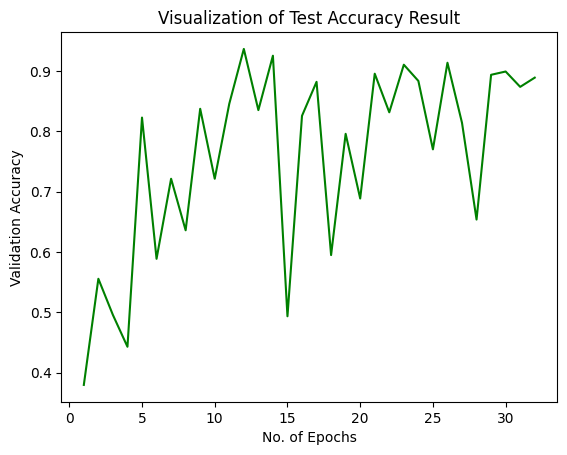

In [42]:
#Test Accuracy
plt.plot(epochs,training_history.history['val_accuracy'],color='Green')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Test Accuracy Result')
plt.show()

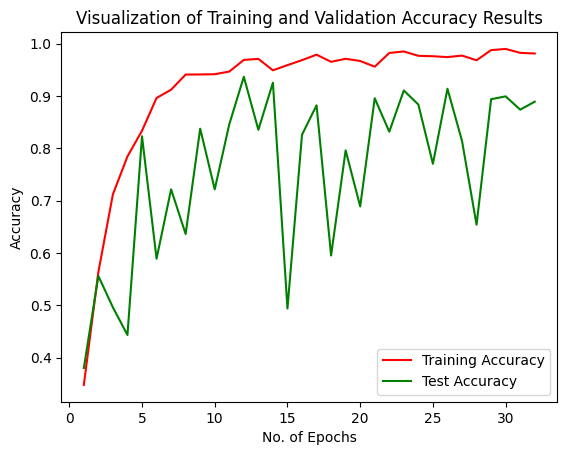

In [43]:
import matplotlib.pyplot as plt

epochs = [i for i in range(1, 33)]

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='Green', label='Test Accuracy')

plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Training and Validation Accuracy Results')
plt.legend()
plt.show()

In [44]:
# Function to preprocess input image for species classification
def preprocess_species_image(image_path, target_size=(224, 224)):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize pixel values
    return img

In [49]:
# Function to predict species
def predict_species(species_model, image_path):
    # Preprocess the input image for species classification
    input_img = preprocess_species_image(image_path)

    # Make predictions using the species model
    species_classes = ["Bangus", "Big Head Carp", "Black Spotted Barb", "Catfish", "Climbing Perch", "Fourfinger Threadfin", "Freshwater Eel", "Glass Perchlet", "Goby", "Gold Fish", "Gourami", "Grass Carp", "Green Spotted Puffer", "Indian Carp", "Indo-Pacific Tarpon", "Jaguar Gapote", "Janitor Fish", "Knifefish", "Long-Snouted Pipefish", "Mosquito Fish", "Mudfish", "Mullet", "Pangasius", "Perch", "Scat Fish", "Silver Barb", "Silver Carp", "Silver Perch", "Snakehead", "Tenpounder", "Tilapia"]  # List of species classes
    species_probabilities = species_model.predict(input_img)[0]
    predicted_species = species_classes[np.argmax(species_probabilities)]

    return predicted_species

In [53]:
# Load the species model
species_model = tf.keras.models.load_model('/content/drive/MyDrive/Models saver/Resnet-50-Class-model.keras')

In [57]:
# Input image file paths
species_image_path = '/content/drive/MyDrive/fish5.jpg'

In [58]:
# Predicting the species of the fish
predicted_species = predict_species(species_model, species_image_path)


1/1 [==============================] - 2s 2s/step


In [59]:
# Print the estimated species, weight in grams, weight in kilograms, and calories
print("Fish Species:", predicted_species)

Fish Species: Tilapia
